In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
column_names = ['ID', 'entity', 'sentiment', 'comment']
twitter = pd.read_csv('/content/drive/MyDrive/Twitter dataset/twitter_training.csv', header=None, names=column_names)


# EDA :

In [4]:
twitter.shape

(74682, 4)

In [21]:
# Count of unique entities
game_counts = twitter['entity'].value_counts()
print(game_counts)

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                            

In [5]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   comment    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
twitter.head(10)

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


### Checking for Duplicates :

In [7]:
duplicates = twitter.duplicated()
duplicated_rows = twitter[duplicates]
duplicated_rows.count()

ID           2700
entity       2700
sentiment    2700
comment      2340
dtype: int64

Dropping Duplicates :

In [8]:
twitter.drop_duplicates(inplace=True)


In [9]:
duplicates = twitter.duplicated()
duplicated_rows = twitter[duplicates]
duplicated_rows.count()


ID           0
entity       0
sentiment    0
comment      0
dtype: int64

### Checking for Missing Values :

In [10]:
twitter.isnull().sum()

ID             0
entity         0
sentiment      0
comment      326
dtype: int64

Dropping Missing Values :

In [11]:
twitter = twitter.dropna()

In [12]:
twitter.isnull().sum()

ID           0
entity       0
sentiment    0
comment      0
dtype: int64

### Number of Unique Values :

In [13]:
twitter.nunique()

ID           12447
entity          32
sentiment        4
comment      69491
dtype: int64

Show Sample :

In [14]:
for i in range(5):
    print(f"{i+1}: {twitter['comment'][i]}   ->   {twitter['sentiment'][i]}")

1: im getting on borderlands and i will murder you all ,   ->   Positive
2: I am coming to the borders and I will kill you all,   ->   Positive
3: im getting on borderlands and i will kill you all,   ->   Positive
4: im coming on borderlands and i will murder you all,   ->   Positive
5: im getting on borderlands 2 and i will murder you me all,   ->   Positive


# Sentiment Analysis

In [15]:
twitter['sentiment'].value_counts()

Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: sentiment, dtype: int64

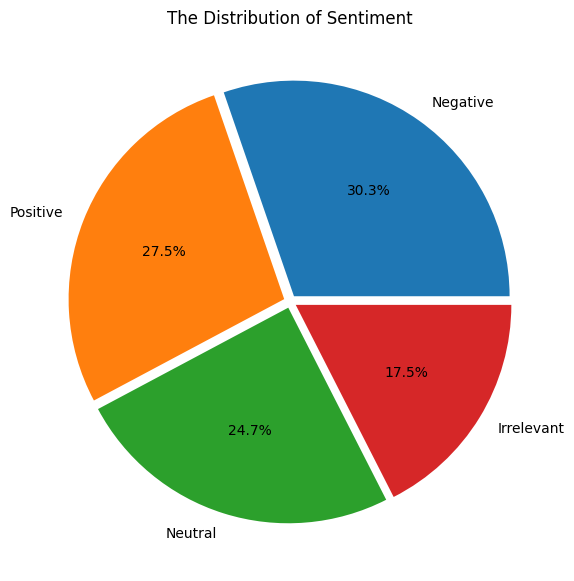

In [44]:

plt.figure(figsize=(10,7))
plt.pie(x=twitter['sentiment'].value_counts().values, labels=twitter['sentiment'].value_counts().index, autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('The Distribution of Sentiment')
plt.show()

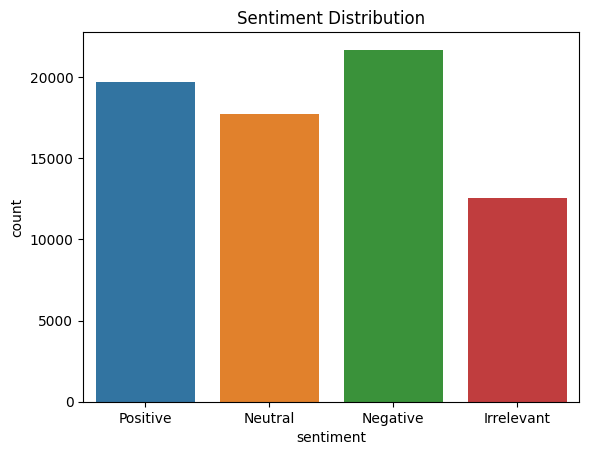

In [17]:
sns.countplot(x='sentiment', data=twitter)
plt.title('Sentiment Distribution')
plt.show()

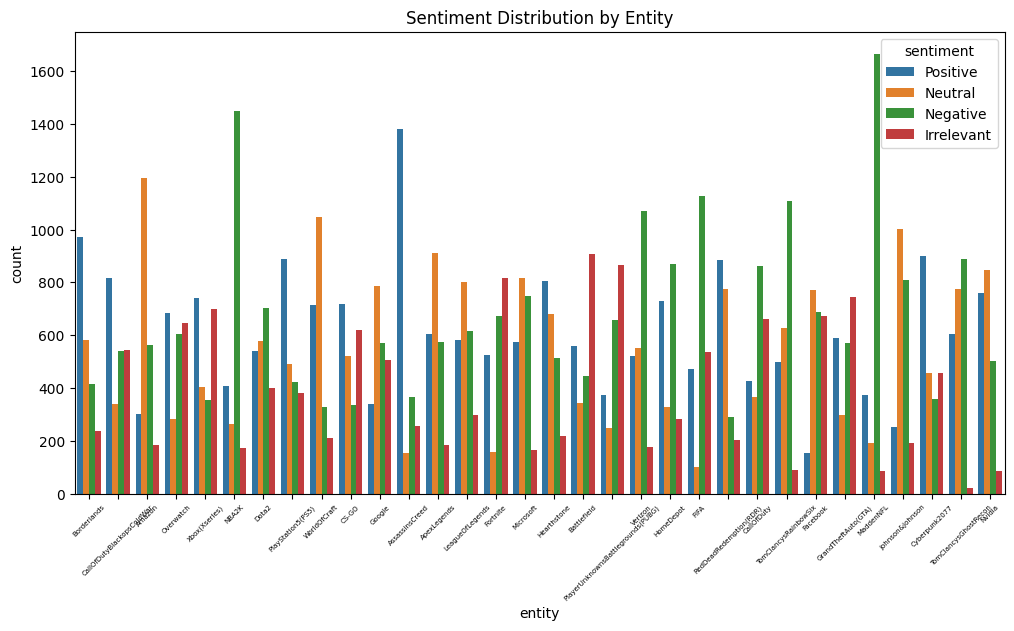

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='entity', hue='sentiment', data=twitter)
plt.title('Sentiment Distribution by Entity')
plt.xticks(rotation=45, fontsize=5)
plt.show()


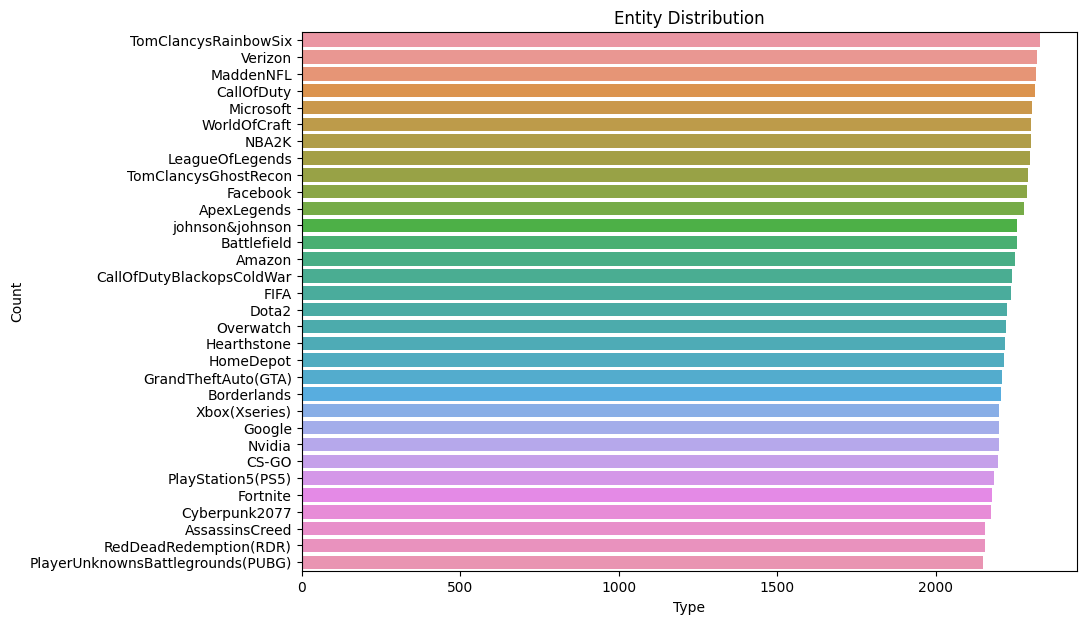

In [49]:
plt.figure(figsize=(10,7))
sns.barplot(x=twitter['entity'].value_counts().values,y=twitter['entity'].value_counts().index)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Entity Distribution')
plt.show()

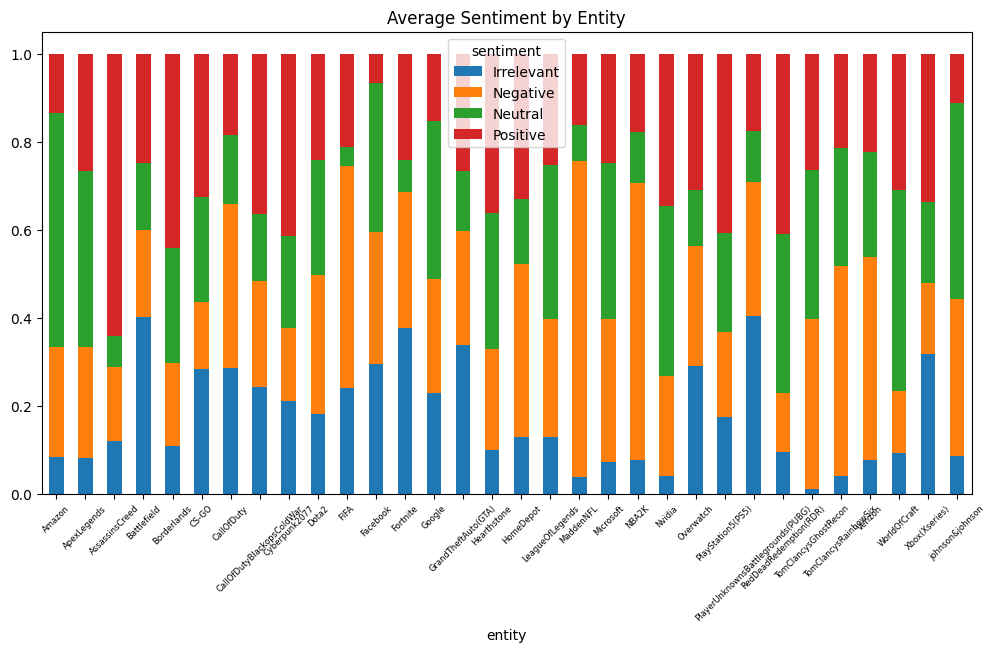

In [50]:
average_sentiment_by_entity = twitter.groupby('entity')['sentiment'].value_counts(normalize=True).unstack()
average_sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sentiment by Entity')
plt.xticks(rotation=45, fontsize=6)
plt.show()


--------------------------------------------------------------------------------

## Word Cloud

In [26]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [28]:
twitter["comment"] = twitter["comment"].apply(clean)

In [24]:
twitter.head()

,ID,entity,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [37]:
from wordcloud import WordCloud, STOPWORDS
wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')

### Positive Sentiment Word Cloud:



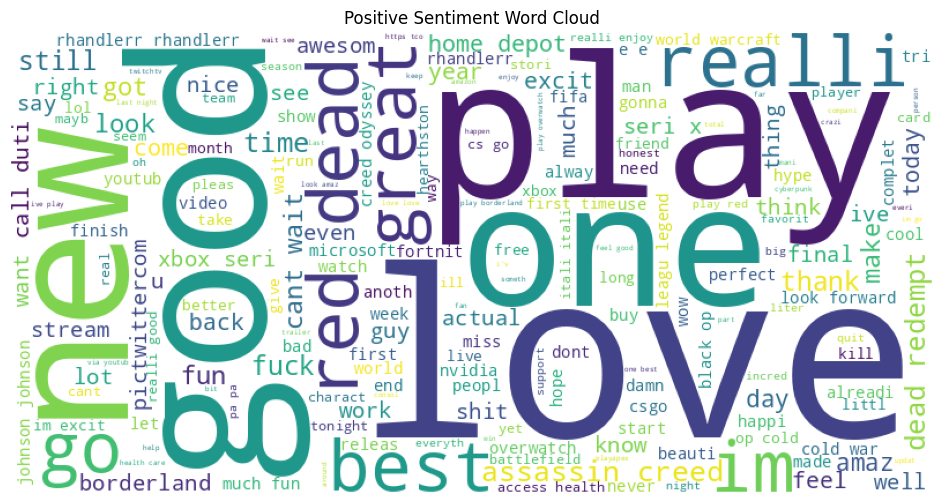

In [39]:

positive_data = twitter[twitter['sentiment'] == 'Positive']['comment'].str.cat(sep=" ")

# Exclude the word "game" from the text data
positive_data = positive_data.replace("game", "")
if positive_data:
    wc = WordCloud(width=800, height=400, background_color='white').generate(positive_data)
    plt.figure(figsize=(12, 6))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")


### Negative Sentiment Word Cloud:

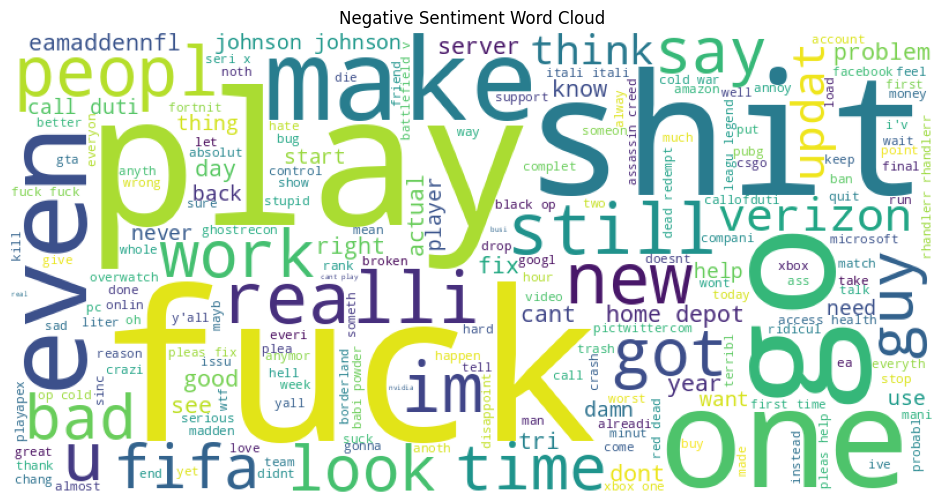

In [51]:
negative_data = twitter[twitter['sentiment'] == 'Negative']['comment'].str.cat(sep=" ")

negative_data = negative_data.replace("game", "")

if negative_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(negative_data)
    plt.figure(figsize=(12, 6))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")



### Neutral Sentiment Word Cloud:

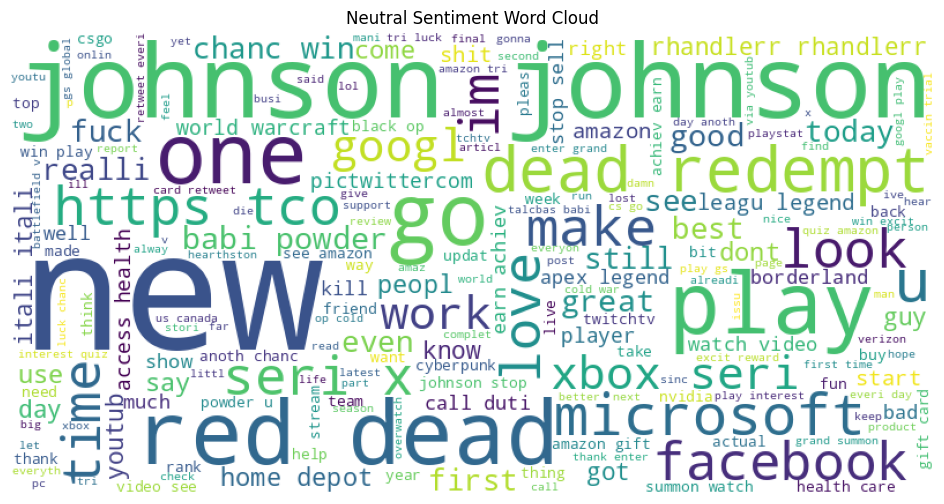

In [52]:
neutral_data = twitter[twitter['sentiment'] == 'Neutral']['comment'].str.cat(sep=" ")

neutral_data = neutral_data.replace("game", "")

if neutral_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(neutral_data)
    plt.figure(figsize=(12, 6))
    plt.title('Neutral Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")



### Irrelevant Sentiment Word Cloud:

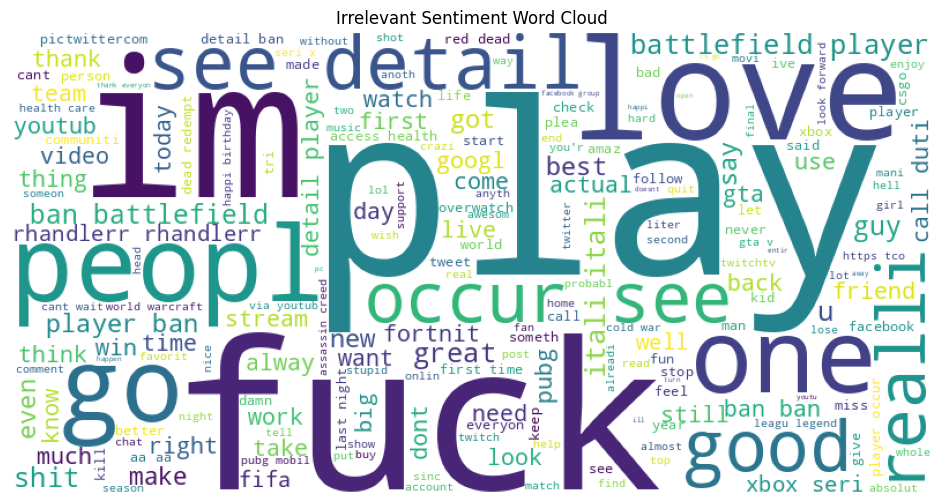

In [53]:
irrelevant_data = twitter[twitter['sentiment'] == 'Irrelevant']['comment'].str.cat(sep=" ")

irrelevant_data = irrelevant_data.replace("game", "")

if irrelevant_data.strip():
    wc = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_data)
    plt.figure(figsize=(12, 6))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")



# Done by Mosab Al-Abdulrahman @ 19 December 2023